# Coursework 1: Convolutional Neural Networks 
### Autograding
Part 1 of this coursework is autograded. This notebook comes with embedded tests which will verify that your implementations provide outputs with the appropriate types and shapes required for our hidden tests. You can run these same public tests through [LabTS](https://teaching.doc.ic.ac.uk/labts) when you have finished your work, to check that we get the same results when running these public tests.

Hidden tests will be ran after the submission deadline, and cannot be accessed :)

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory or Paperspace, where you can access GPUs.

You should receive an email at your imperial address inviting you to join the course team on PaperSpace (within a day of the coursework being released).

#### Paperspace
See [the Paperspace information doc](https://hackmd.io/@afspies/S1stL8Qnt). 

The public tests are embedded within the notebook. You can ignore the "tests" folder as it is only required for colab.


#### Google Colab
To run this notebook on Google Colab, please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

**To run the public tests within colab** you will need to copy the "tests" folder to the /content/ directory (this is the default working directory - you can also change directories with %cd). You may also need to place a copy of the CW ipynb in the /content/ directory. A better option is to mount colab on gdrive and keep the files there (so you only need to do the set up once).

#### Setup
You will need to install pytorch and other libraries by running the following cell:

In [2]:
!pip install -q otter-grader pandoc torch torchvision sklearn seaborn

^C
ERROR: Operation cancelled by user


In [23]:
# Initialization Cell
import otter
grader = otter.Notebook("dl_cw_1.ipynb")
import matplotlib.pyplot as plt # DO NOT use %matplotlib inline in the notebook
import numpy as np
rng_seed = 90

## Introduction
In this courswork you will explore various deep learning functionalities through implementing a number of pytorch neural network operations/layers and creating your own deep learning model and methodology for a high dimensional classification problem.

#### Intended learning outcomes
- An understanding of the mechanics behind convolutional, pooling, linear and batch norm operations. 
- Be able to implement convolution, pooling, linear and batch norm layers from basic building blocks.
- Experience designing, implementing and optimising a classifier for a high dimensional dataset.

## Part 1 (50 points)

In this part, you will use basic Pytorch operations to define the 2D convolution, 2D max pooling, linear layer, as well as 2D batch normalization operations. Being computer scientists we care about efficiency, we therefore do not want to see any _for loops_!

**Your Task**
- Implement the forward pass for Conv2D (15 points), MaxPool2D (15 points), Linear (5 points) and BatchNorm2d (15 points)
- You are **NOT** allowed to use the torch.nn modules (The one exception is that the class inherits from nn.Module)

_hint: check out F.unfold and F.fold, they may be helpful_

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height H' and width W'.

        Parameters:
        - w: Filter weights of shape (F, C, H', W',)
        - b: Biases of shape (F,)
        - kernel_size: Union[int, (int, int)], Size of the convolving kernel (x, y)
        - stride: Union[int, (int, int)], Number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: Union[int, (int, int)], Number of pixels that will be used to zero-pad the input.(width x height)
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Define the parameters used in the forward pass
        ...
        # Do not initialize weights or biases with torch.empty() but rather use torch.zeros()
        # Weights should have shape [out_channels, in_channels, kernel_x, kernel_y]
        
        ## check order of inputs!!!!! height goes first or width?
        
        if isinstance(kernel_size, int):
            kernel_x = kernel_y = kernel_size  
        else:
            kernel_x = kernel_size[0] #height
            kernel_y = kernel_size[1] #width
            
        if isinstance(stride, int):
            stride_w = stride_h = stride
        else:
            stride_w = stride[0]
            stride_h = stride[1]
        
        if isinstance(padding, int):
            pad_w = pad_h = padding
        else:
            pad_w = padding[0]
            pad_h = padding[1]
        
        self.w = torch.zeros(size=(out_channels, in_channels, kernel_x, kernel_y), requires_grad=True)
        # Bias should have shape [out_channels] 
        self.b = torch.zeros(out_channels, requires_grad=True)
        self.F = out_channels
        self.C = in_channels
        self.kernel_size = (kernel_x, kernel_y)
        self.stride = (stride_w, stride_h)
        self.padding = (pad_w, pad_h)
        self.bias = bias
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Implement the forward pass                                     #
        N, C, H, W = x.size()

        unfolded_x = F.unfold(x, kernel_size=self.kernel_size,padding=self.padding, stride=self.stride) #shape (N, C*k_x*k_y, nb kernel slides image)
        conv_x = unfolded_x.transpose(1,2).matmul(self.w.view(self.w.size(0),-1).t()).transpose(1,2)

        H_out = int((H - self.kernel_size[0] + 2*self.padding[0])/self.stride[0] + 1)
        W_out = int((W - self.kernel_size[1] + 2*self.padding[1])/self.stride[1] + 1)
        
        out = F.fold(conv_x, output_size=(H_out,W_out), kernel_size=(1,1))

        if self.bias:
            out = (out.permute(0,3,2,1)+self.b).permute(0,3,2,1)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out  

In [25]:
grader.check("Convolution Layer")

Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: Union[int, (int, int)], the size of the window to take a max over
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if isinstance(kernel_size, int):
            kernel_x = kernel_y = kernel_size
        else:
            kernel_x = kernel_size[0] #height
            kernel_y = kernel_size[1] #width
        ...
        self.kernel_size = (kernel_x, kernel_y)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        N, C, H, W = x.size()
        #print(x.size())
        #print(self.kernel_size)
        unfolded_x = F.unfold(x, kernel_size=self.kernel_size, stride=self.kernel_size)
        _ ,_ , slide_nb = unfolded_x.size()
        #print(unfolded_x.size())
        
        reshpaed_x = unfolded_x.view(N, C, -1, slide_nb) #reshape to account for diff channel
        #print(reshpaed_x.size())
        pooled_x, _ = reshpaed_x.max(dim=-2)
        #print("pooled",pooled_x.size())
        H_out = H // self.kernel_size[0]
        W_out = W // self.kernel_size[1]
        out = F.fold(pooled_x, output_size=(H_out, W_out), kernel_size=(1,1))
        # print(folded_x.size())
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [28]:
grader.check("MaxPool Layer")

MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed

In [29]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        # Also no initialisation methods for this reason
        self.w = torch.zeros(size=(in_channels, out_channels))
        self.b = torch.zeros(out_channels)
        self.bias = bias
        ...
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        dot_prod = x.matmul(self.w)
        
        # account for bias option, need to check ########
        if self.bias:
            out = dot_prod + self.b
        else:
            out = dot_prod
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [30]:
grader.check("Linear Layer")

Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

In [34]:
# conv, linear, maxpool layer checks

import torch
import torch.nn as nn
 
# Convolutional layer checks
in_channels = 98
out_channels = 2
kernel_size = (2,3)
stride = (2,3)
padding = 1

conv_jy = Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=True)
conv_nn = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=True)
 
conv_jy.w = conv_nn.weight
conv_jy.b = conv_nn.bias
 
image = torch.rand(2, in_channels, 13, 13)
 
out_jy = conv_jy(image)
out_nn = conv_nn(image)
 
print(out_jy.shape)
print(out_nn.shape)
#print(out_jy)
#print(out_nn)
print(torch.allclose(out_jy, out_nn, 10**(-4), 10**(-7)))

max_nn = nn.MaxPool2d(kernel_size)
max_jy = MaxPool2d(kernel_size)
out_jy = max_nn(image)
out_nn = max_jy(image)

print(torch.allclose(out_jy, out_nn, 10**(-4), 10**(-7)))

linear_nn = nn.Linear(in_channels,out_channels,bias=True)
linear_jy = Linear(in_channels,out_channels,bias=True)

data = torch.rand(2,3, in_channels)
#print(linear_nn.weight.shape)
#print(linear_jy.w.shape)

linear_jy.w = linear_nn.weight.t()
linear_jy.b = linear_nn.bias
out_nn = linear_nn(data)
out_jy = linear_jy(data)
print(torch.allclose(out_jy, out_nn, 10**(-4), 10**(-7)))


torch.Size([2, 2, 7, 5])
torch.Size([2, 2, 7, 5])
True
True
True


In [31]:
class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
        An implementation of a Batch Normalization over a mini-batch of 2D inputs.

        The mean and standard-deviation are calculated per-dimension over the
        mini-batches and gamma and beta are learnable parameter vectors of
        size num_features.

        Parameters:
        - num_features: C from an expected input of size (N, C, H, W).
        - eps: a value added to the denominator for numerical stability. Default: 1e-5
        - momentum: the value used for the running_mean and running_var
        computation. Default: 0.1 . (i.e. 1-momentum for running mean)
        - gamma: the learnable weights of shape (num_features).
        - beta: the learnable bias of the module of shape (num_features).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum #used in training time

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        self.gamma = torch.ones(num_features, requires_grad=True)[None,:,None, None]
        self.beta = torch.zeros(num_features, requires_grad=True)[None,:,None, None]
        self.moving_mu = torch.zeros(num_features)[None,:,None, None] # change name
        self.moving_sigma = torch.ones(num_features)[None,:,None, None]
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """  
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # training
        if torch.is_grad_enabled():
            N, C, H, W = x.size()
            mu = x.mean(dim=(0,2,3), keepdim=True)
            self._tmp_mean = mu
            var = x.var(dim=(0,2,3), keepdim=True, unbiased=False) # turn off bias correction
            self._tmp_var = var
            
            normalised = (x - mu)/torch.sqrt(var+self.eps) 
            self._tmp_x_hat_train = normalised
            out = self.gamma*normalised + self.beta
            
            # update running mean, sd
            self.moving_mu = (self.momentum)*mu + (1-self.momentum)*self.moving_mu
            self.moving_sigma = (self.momentum)*var + (1-self.momentum)*self.moving_sigma
            
            self._tmp_moving_mu = self.moving_mu
            self._tmp_moving_sigma = self.moving_sigma
            
        # testing
        else:
            normalised = (x - self.moving_mu)/torch.sqrt(self.moving_sigma+self.eps)
            self._tmp_x_hat_test = normalised
            out = self.gamma*normalised + self.beta
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [32]:
grader.check("BatchNorm Layer")

BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

In [35]:
#batchnorm check
import torch
import torch.nn as nn
import torch.nn.functional as F
rng_seed = 90
torch.manual_seed(rng_seed)
in_channels = 3
image = torch.randn(2, in_channels, 2, 2)

batchNorm_jy = BatchNorm2d(in_channels)
nn_batchnorm = nn.BatchNorm2d(in_channels)

my_out = batchNorm_jy(image)
nn_out = nn_batchnorm(image)
print(torch.allclose(my_out, nn_out, 10**(-4), 10**(-7)))


with torch.no_grad():
    nn_batchnorm = nn.BatchNorm2d(in_channels, affine=False)
    batchNorm_jy2= BatchNorm2d(in_channels)
#     batchNorm_jy2.moving_mu = nn_batchnorm.running_mean[None,:,None, None]
#     batchNorm_jy2.moving_sigma = nn_batchnorm.running_var[None,:,None, None]
#     batchNorm_jy2.gamma = nn_batchnorm.weight[None,:,None, None]
    nn_batchnorm.running_mean = batchNorm_jy2.moving_mu.flatten()
    nn_batchnorm.running_var = batchNorm_jy2.moving_sigma.flatten()
    nn_batchnorm.weight = nn.Parameter(batchNorm_jy2.gamma.flatten())
    nn_batchnorm.bias = nn.Parameter(batchNorm_jy2.beta.flatten())
    nn_batchnorm.eval()

    my_out = batchNorm_jy2(image)
    nn_out = nn_batchnorm(image)
    print(torch.allclose(my_out, nn_out, 10**(-4), 10**(-7)))

True
True


## Part 2 (40 points)

In this part, you will design, train and optimise a custom deep learning model for classifying a specially selected subset of Imagenet. Termed NaturalImageNet, it is made up of a hand selected subset of the famous ImageNet dataset. The dataset contains 20 classes, all animals from the natural world. We hope that this dataset will be fun to work with but also a challenge.

You will be marked on your experimental process, methods implemented and your reasoning behind your decisions. While there will be marks for exceeding a baseline performance score we stress that students should **NOT** spend excessive amounts of time optimising performance to silly levels.

We have given you some starter code, please feel free to use and adapt it.

**Your Task**
1. Develop/adapt a deep learning pipeline to maximise performance on the test set. (30 points)
    * 10 points will be awarded for improving on the baseline score on the test set. Don't worry you can get full marks here by improving by a minor amount.
    * 20 points will be awarded for the adaptations made to the baseline model and pipeline.

2. Answer the qualititative questions (10 points)

**Downloading NaturalImageNet**

In [1]:
ON_COLAB = False

!wget https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
!wget https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
if ON_COLAB:
    !unzip /content/NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip /content/NaturalImageNetTrain.zip?download=1 > /dev/null
else: 
    !unzip NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip NaturalImageNetTrain.zip?download=1 > /dev/null

--2023-01-28 00:37:54--  https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138507970 (132M) [application/octet-stream]
Saving to: ‘NaturalImageNetTest.zip?download=1.4’

NaturalImageNetTest 100%[===================>] 132.09M  2.49MB/s    in 30s     

2023-01-28 00:38:32 (4.38 MB/s) - ‘NaturalImageNetTest.zip?download=1.4’ saved [138507970/138507970]

--2023-01-28 00:38:33--  https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1383630100 (1.3G) [application/octet-stream]
Saving to: ‘NaturalImageNetTrain.zip?download=1.4’

NaturalImageNetTrai 100%[===================>]   1.29G  6.08MB/s  

In [2]:
#torch
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
#other
import matplotlib.pyplot as plt
import numpy as np
# set the seed for reproducibility
rng_seed = 90
torch.manual_seed(rng_seed)

In [3]:
# When we import the images we want to first convert them to a tensor. 
# It is also common in deep learning to normalise the the inputs. This 
# helps with stability.
# To read more about this subject this article is a great one:
# https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

# transforms is a useful pytorch package which contains a range of functions
# for preprocessing data, for example applying data augmentation to images 
# (random rotations, blurring the image, randomly cropping the image). To find out
# more please refer to the pytorch documentation:
# https://pytorch.org/docs/stable/torchvision/transforms.html

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])
transform = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )
train_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTrain'
test_path = ('/content/' if ON_COLAB else '') +'NaturalImageNetTest'

train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

# Create train val split
n = len(train_dataset)
n_val = int(n/10)

train_set, val_set = torch.utils.data.random_split(train_dataset, [n-n_val, n_val])


print(len(train_set), len(val_set), len(test_dataset))


# The number of images to process in one go. If you run out of GPU
# memory reduce this number! 
batch_size = 32

# Dataloaders are a great pytorch functionality for feeding data into our AI models.
# see https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# for more info.

loader_train = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_val = DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

17986 1998 2000


In [4]:
unnormalize = transforms.Normalize((-mean / std).tolist(), (1.0 / std).tolist())

def denorm(x):
    '''
    Function to reverse the normalization so that we can visualise the outputs
    '''
    x = unnormalize(x)
    x = x.view(x.size(0), 3, 256, 256)
    return x

def show(img):
    '''
    function to visualise tensors
    '''
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)).clip(0, 1))

**Visualising some example images** 

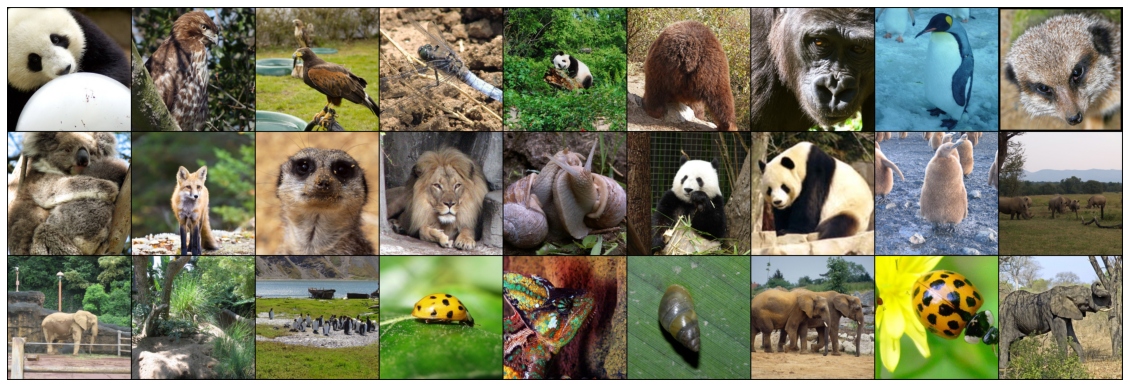

In [5]:
sample_inputs, _ = next(iter(loader_val))
fixed_input = sample_inputs[:27, :, :, :]

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20,10))
plt.axis('off')
show(img)

Next, we define ResNet-18:

In [6]:
# define resnet building blocks

class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        
        super(ResidualBlock, self).__init__() 
        
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            # 1x1 conv act as dimension adaptor
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        
        out = self.left(x) 
        
        out += self.shortcut(x) 
        
        out = F.relu(out) 
        
        return out


    
# define resnet

class ResNet(nn.Module):
    
    def __init__(self, ResidualBlock, num_classes = 20):
        
        super(ResNet, self).__init__()
        
        self.inchannel = 64
        self.conv1 = nn.Sequential(Conv2d(3, 64, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(64), 
                                  nn.ReLU())
        
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride = 2)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        self.layer5 = self.make_layer(ResidualBlock, 1024, 2, stride = 2)
        self.layer6 = self.make_layer(ResidualBlock, 2048, 2, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.fc = nn.Linear(2048, num_classes)
    
    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        
        layers = []
        
        for stride in strides:
            
            layers.append(block(self.inchannel, channels, stride))
            
            self.inchannel = channels #match output channel to next input channel 
            
        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
    
# please do not change the name of this class
def MyResNet():
    return ResNet(ResidualBlock)

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def confusion(preds, y):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # Plotting the confusion matrix
  cm = confusion_matrix(y.cpu().numpy(), preds.cpu().numpy(), normalize='true')
  fig, ax= plt.subplots(1, 1, figsize=(15,10))
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(labels, rotation = 70); ax.yaxis.set_ticklabels(labels, rotation=0);
  plt.show()

def incorrect_preds(preds, y, test_img):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # lets see a sample of the images which were classified incorrectly!
  correct = (preds == y).float()
  test_labels_check = correct.cpu().numpy()
  incorrect_indexes = np.where(test_labels_check == 0)

  test_img = test_img.cpu()
  samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
                      padding=2, normalize=False, value_range=None, 
                      scale_each=False, pad_value=0)
  plt.figure(figsize = (20,10))
  plt.title('Incorrectly Classified Instances')
  show(samples)
  labels = np.asarray(labels)
  print('Predicted label',labels[preds[incorrect_indexes].cpu().numpy()[:9]])
  print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
  print('Corresponding images are shown below')

In [8]:
USE_GPU = True
dtype = torch.float32 


if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)
    

print_every = 10
def check_accuracy(loader, model, analysis=False):
    # function for test accuracy on validation and test set
    
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            if t == 0 and analysis:
              stack_labels = y
              stack_predicts = preds
            elif analysis:
              stack_labels = torch.cat([stack_labels, y], 0)
              stack_predicts = torch.cat([stack_predicts, preds], 0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct of val set (%.2f)' % (num_correct, num_samples, 100 * acc))
        if analysis:
          print('check acc', type(stack_predicts), type(stack_labels))
          confusion(stack_predicts, stack_labels)
          incorrect_preds(preds, y, x)
        return float(acc)

        

def train_part(model, optimizer, epochs=1):
    """
    Train a model on NaturalImageNet using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
        check_accuracy(loader_val, model)
                

cuda:0


Total number of parameters is: 179016916
Epoch: 0, Iteration 0, loss = 3.8436
Epoch: 0, Iteration 10, loss = 3.6581
Epoch: 0, Iteration 20, loss = 2.7617
Epoch: 0, Iteration 30, loss = 3.8682
Epoch: 0, Iteration 40, loss = 2.8438
Epoch: 0, Iteration 50, loss = 2.7460
Epoch: 0, Iteration 60, loss = 2.2634
Epoch: 0, Iteration 70, loss = 2.7051
Epoch: 0, Iteration 80, loss = 2.7012
Epoch: 0, Iteration 90, loss = 2.3351
Epoch: 0, Iteration 100, loss = 2.4018
Epoch: 0, Iteration 110, loss = 2.8287
Epoch: 0, Iteration 120, loss = 2.3553
Epoch: 0, Iteration 130, loss = 2.5058
Epoch: 0, Iteration 140, loss = 2.3560
Epoch: 0, Iteration 150, loss = 2.1638
Epoch: 0, Iteration 160, loss = 2.6534
Epoch: 0, Iteration 170, loss = 1.8445
Epoch: 0, Iteration 180, loss = 2.4462
Epoch: 0, Iteration 190, loss = 2.2807
Epoch: 0, Iteration 200, loss = 2.8690
Epoch: 0, Iteration 210, loss = 2.5155
Epoch: 0, Iteration 220, loss = 2.1020
Epoch: 0, Iteration 230, loss = 2.3206
Epoch: 0, Iteration 240, loss = 2.

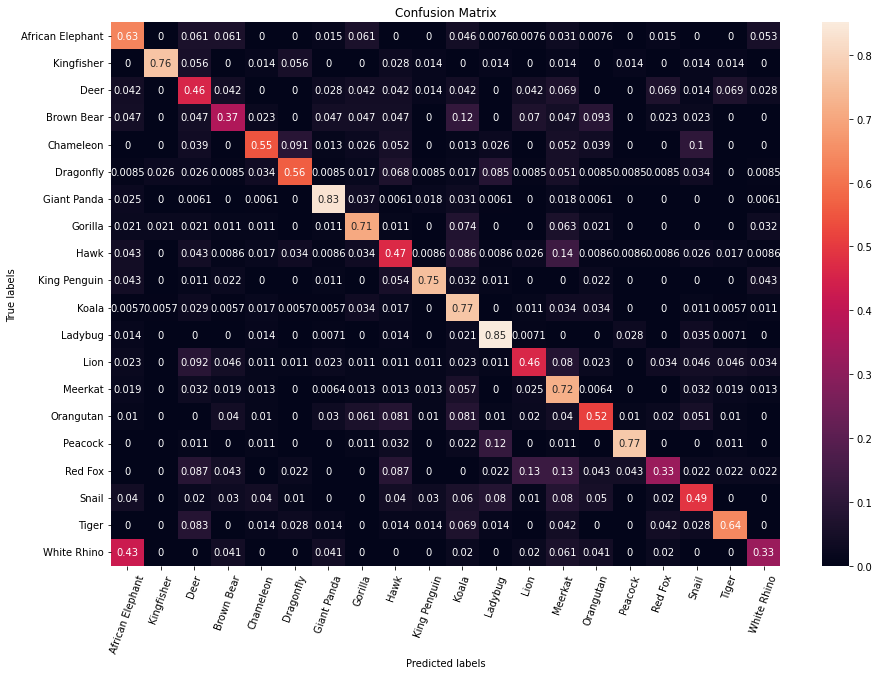

Predicted label ['Peacock' 'Ladybug' 'Snail' 'Gorilla' 'Koala' 'Ladybug' 'Deer']
True label ['Red Fox' 'Dragonfly' 'Ladybug' 'African Elephant' 'Meerkat' 'Peacock'
 'Meerkat']
Corresponding images are shown below


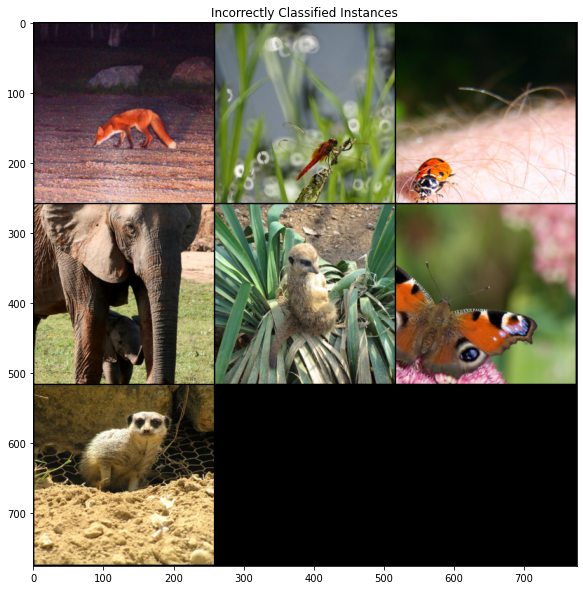

In [9]:
# define and train the network
model = MyResNet()
optimizer = optim.Adamax(model.parameters(), lr=0.0001, weight_decay=1e-7) 

params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))

train_part(model, optimizer, epochs = 10)


# report test set accuracy
check_accuracy(loader_val, model, analysis=True)


# save the model
torch.save(model.state_dict(), 'model.pt')

---

<!-- BEGIN QUESTION -->

### Network Performance

Run the code below when all engineering decisions have been made, do not overfit to the test set!

**Note that** this will appear in the output, and be checked by markers (so ensure it is present in the auto-export)

Got 1247 / 2000 correct of val set (62.35)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


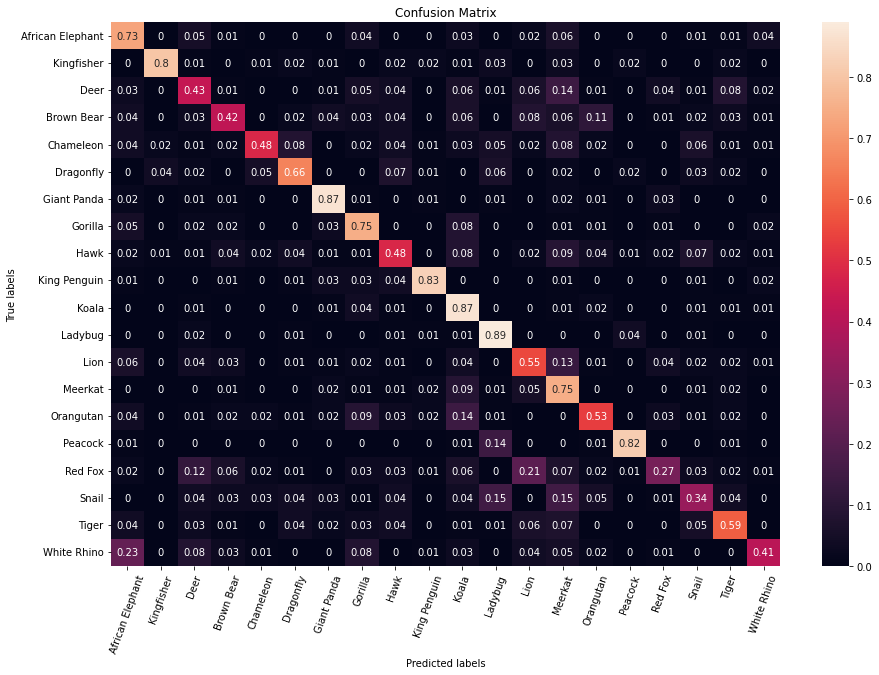

Predicted label ['Snail' 'Meerkat']
True label ['Chameleon' 'Brown Bear']
Corresponding images are shown below


0.6235

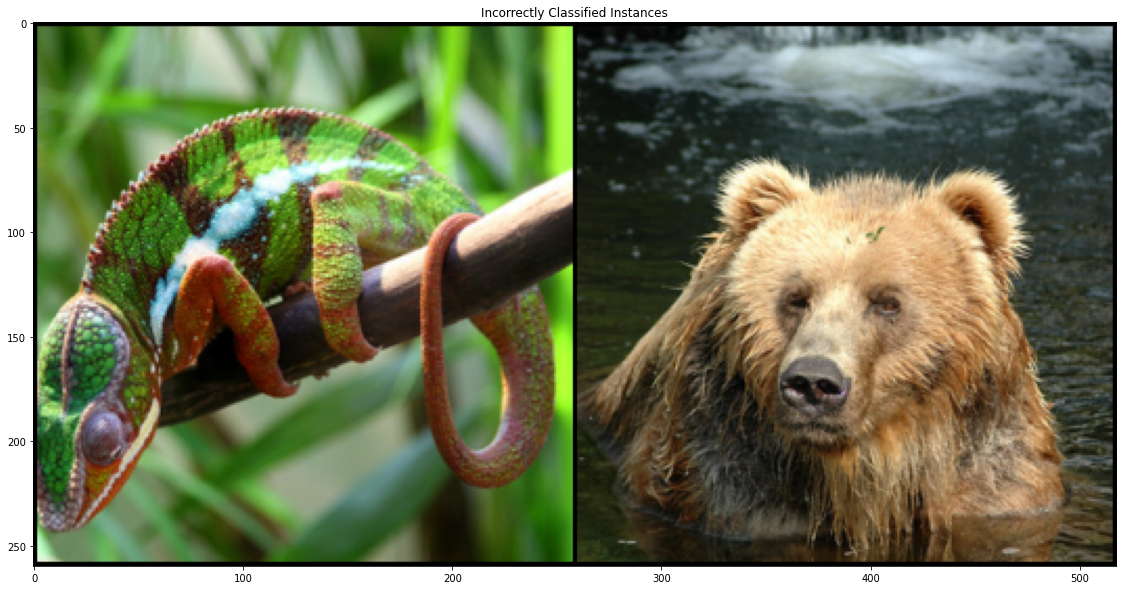

In [10]:
# Run once your have trained your final model
check_accuracy(loader_test, model, analysis=True)

___

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.1: Hyperparameter Search:
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? (3 points)

**Answer:**

If there is a preceding model that successfully reaches the state-of-art performance, I will use the hyperparameters from that model as a starting point. For example, from VGG we know that setting all kernel sizes equal to 3x3 will work better than setting kernel to larger sizes like 5x5. Also, from ResNet, doubling the output channel after each residual block let the network learn deeper features.

The other way is to group parameters together. For example, I set all kernels in the network will be 3x3. All layers contain 2 residual blocks. Grouping parameters together effectely reduce the number of hyperparameters to search for.

In addition, if the combination of hyperparameter values does not reach the required performance, I will change one hyperparameter at a time to investigate the particular hyperparameter's effect. I try not to change more than one hyperparameter simultaneously to see the effect of one particular hyperparameter.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.2: Engineering Decisions 

Detail which engineering decisions you made to boost the performance of the baseline results. Why do you think that they helped? (7 points)

**Answer:**

I made two changes: 
1. increase the output channel in the first convolutional layer and adjust the input and output channels in the succeeding layers 
2. lower the batch size. 

The main boost in the network performance comes from the first change. Originally the given output channel of the first convolutional network was 16, i.e. the first convolutional network uses 16 different kernels to produce 16 activation maps, and each 3x3 grid in the image was summarised by 16 features contained in a 16-dimensional vector. The 16 activation maps were then passed to succeeding layers, where the first block of each layer halves the height and width of the activation maps and doubles their channels. 

However, the result showed that summarising each grid with 16 features in the first convolutional network could not reach the desired performance given other hyperparameters fixed. Therefore I increased the output channel to encode each grid with more than 16 features. I tried from 16 to 32 and then to 64 and found 64 yields good performance on both the training and the validation set (around 63% accuracy for both), which correspond to the original ResNet-18 architecture. So now, the first layer summarises each grid of the image with a 64-dimensional vector, which has more representation power than a 16-dimensional vector. As the network can describe the input image more precisely with more features, it yields better accuracy than the baseline model.

The second change is to save the computational cost. As I increased the output channel in the first convolutional network, each residual block in the succeeding layers need to perform more convolutional operations. More operations require more training time and memory. Decreasing the batch sizes speeds up the training process, so I lowered the batch size from 128 to 32. In addition to the lower computational cost, smaller batch sizes produce noisy gradient estimates for the network parameters, which may allow the gradient descent algorithm to bypass the local optimum in the non-convex surface of the loss function, giving a better convergence.

The combination of the two changes and the existing hyperparameters works well, so I use it as my final model.

---

<!-- END QUESTION -->

## Part 3 (10 points)

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions*(: 

<!-- BEGIN QUESTION -->

### Q3.1 : Learned Features

Compare the feature maps from low-level layers to high-level layers, what do you observe? (4 points)

**Answer:**

The feature maps in the low-level layers have higher resolution, more colours, and clearer figures while those in high-level layers have lower resolution, fewer colours, and vague figures. The reason is that in the low-level layers, the network extracts low-level features such as lines and edges, so the resulting feature maps are still interpretable to humans. Moving to higher-level layers, the network extracts high-level features which are built on low-level features. The resulting feature maps become uninterpretable.


---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.2: Performance Analysis

Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)

**Answer:**

I think the network performance is sufficiently good, because 

1. the loss in the training log decreases exponentially as the number of epochs increases. The loss in the last 3 episodes only shows a little decline. 


2. the test set accuracy is 62.35%, which is similar to the one in the validation set (63.96%).


3. both the test and the validation accuracy surpass the desired performance (50%) by more than 10%. 


4. the feature maps in the same layer capture different features. Maps become coarser as the level of layers increases as expected.


For point 1, in the first 7 epochs there is an obvious decrease in loss as the number of epochs increases. However, in the last 3 epochs there is only a small decrease in loss and a tiny improvement in accuracy as the training continues. The little improvement in loss and accuracy in the last few epochs suggests that the network has almost reached its full capacity, i.e. gradient descent algorithm has reached the local minimum.

Point 2 suggests that the network does not overfit and generalises well on the unseen data.

Point 3 suggests the network can stably meet the required accuracy performance.

Point 4 suggests network successfully extracts different features of the image with the learned kernels at the same level. With the learned low-level features, the network succesfully build higher level features based on the previously learnt features.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.3: Alternative Evaluations

What are the other possible ways to analyse the performance of your network? (2 points)

**Answer:**

Look at other matrices other than accuracy. For example, calculate the precision, recall, and F1 socres for each class can evalutate network's performance on particular classes. For example, if the network has high precision in cats that means most of the instances that the network identifies as a cat is actually a cat.


---

<!-- END QUESTION -->

**Feature Visualization**

The code below will visualize the features of your network layers (you may need to modify the layer names if you made changes to your architecture). 

If you change the plotting code, please ensure it still exports correctly when running the submission cell.

In [11]:
import matplotlib.pyplot as plt

def plot_model_features():
    fig = plt.tight_layout()
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6']

    for l in vis_labels:
        getattr(model, l).register_forward_hook(get_activation(l))
        

    data, _ = test_dataset[999]
    data = data.unsqueeze_(0).to(device = device, dtype = dtype)
    output = model(data)

    for idx, l in enumerate(vis_labels):
        act = activation[l].squeeze()

        # only showing the first 16 channels
        ncols, nrows = 8, 2
        
        fig, axarr = plt.subplots(nrows, ncols, figsize=(15,5))
        fig.suptitle(l)

        count = 0
        for i in range(nrows):
            for j in range(ncols):
                axarr[i, j].imshow(act[count].cpu())
                axarr[i, j].axis('off')
                count += 1

<!-- BEGIN QUESTION -->



<Figure size 432x288 with 0 Axes>

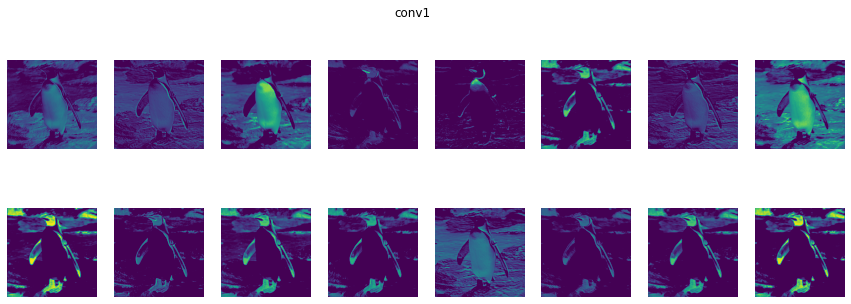

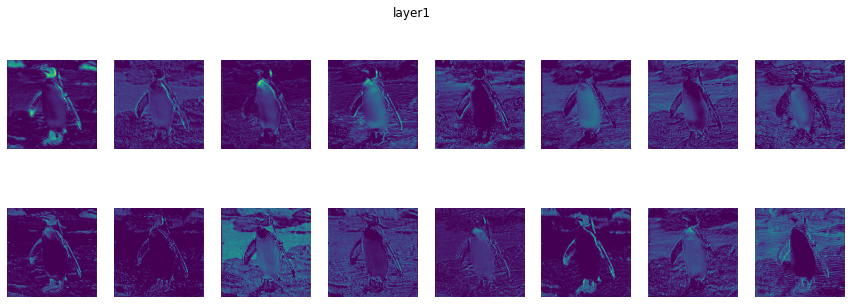

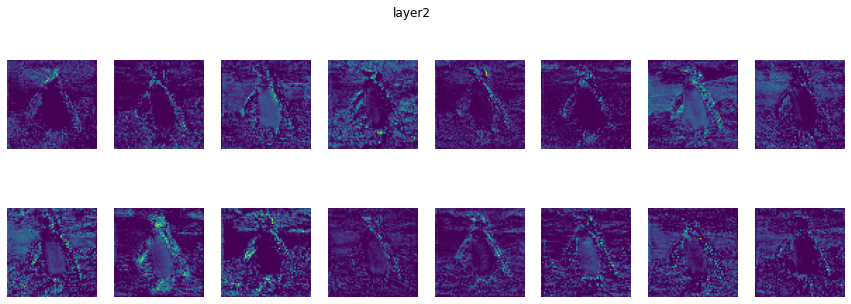

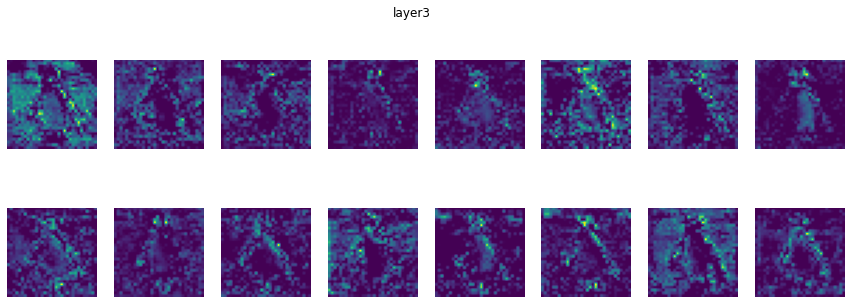

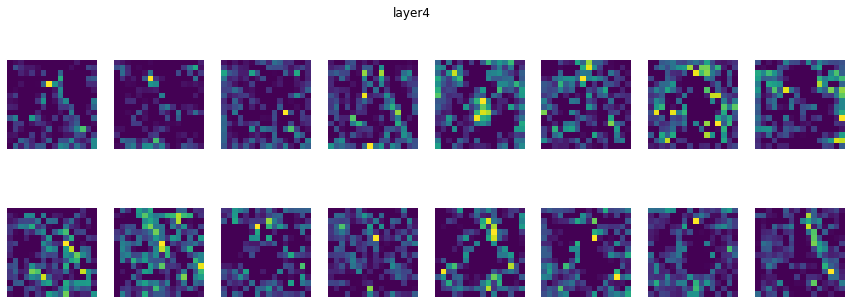

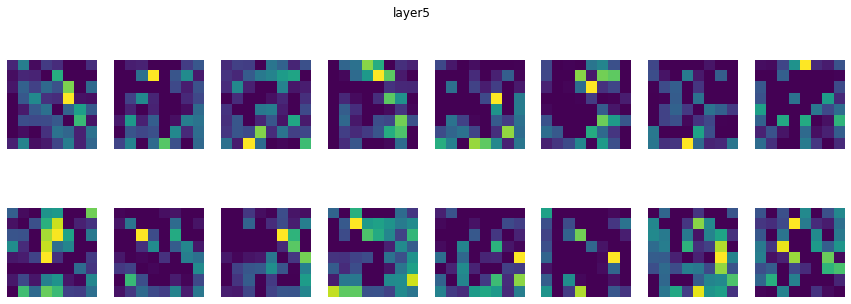

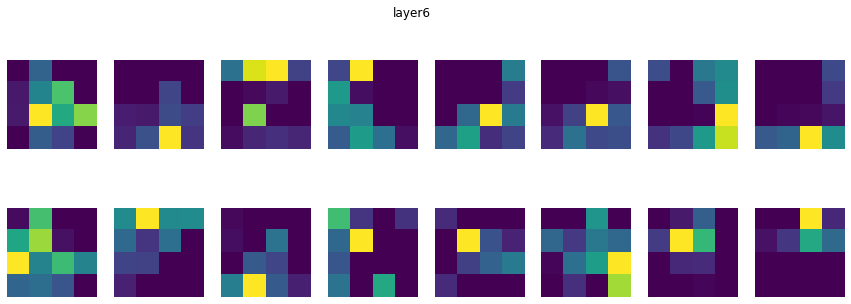

In [12]:
# Visualize the figure here, so it is exported nicely
plot_model_features()  

<!-- END QUESTION -->

## Submission
Git push your finalized version of this notebook (with saved outputs) to the gitlab repo which you were assigned. You should request our tests once and check that the ```preview.pdf```:
* Passes all public tests (these are the same ones provided / embedded in the notebook itself)
* Contains your qualitative answers
* Contains your figures (confusion matrix and network features)

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [53]:
grader.check_all()

BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed